# **1. Perkenalan Dataset**


Dataset ini merupakan kumpulan data penjualan yang disimulasikan secara realistis dalam industri minuman. Data ini menggambarkan pola transaksi baik dari sisi Business-to-Business (B2B) maupun Business-to-Consumer (B2C), mencakup preferensi wilayah, fluktuasi musiman, serta segmentasi pelanggan. Dataset ini dirancang untuk keperluan analisis tanpa label dan sangat cocok digunakan dalam tahap awal proses data mining, khususnya unsupervised learning seperti clustering.

Berikut adalah alasan mengapa dataset ini memenuhi seluruh ketentuan yang diminta:


1. **Tanpa Label (Unlabeled Data)**.
Dataset ini tidak memiliki label atau kelas target. Seluruh fitur yang tersedia bersifat deskriptif, sehingga sangat cocok untuk metode unsupervised learning seperti clustering.
2. **Jumlah Baris Mencukupi**.
Dataset ini memiliki lebih dari 1000 baris, yang menjamin bahwa proses clustering akan memberikan hasil yang bermakna dan representatif terhadap data.
3. **Tipe Data yang Beragam**.
Dataset ini mencakup kombinasi data kategorikal dan numerikal, yang menjadi syarat penting untuk analisis komprehensif.

  - Fitur kategorikal: Customer_Type, Product, Category, dan Region.
  - Fitur numerikal: Unit_Price, Quantity, Discount, dan Total_Price.
4. **Belum Termasuk Dataset Umum untuk Clustering**.
Dataset ini bukan termasuk dataset umum yang sering dipakai dalam latihan clustering, seperti Mall Customer Segmentation atau Online Retail dari UCI. Oleh karena itu, penggunaannya masih valid dan tidak melanggar ketentuan pembatasan.

5. **Potensi Analisis yang Luas**.
Dataset ini memiliki struktur yang kaya sehingga memungkinkan berbagai analisis clustering seperti:

  - Segmentasi pelanggan berdasarkan perilaku belanja dan jenis pelanggan (B2B/B2C).

  - Identifikasi pola pembelian berdasarkan wilayah (Region) dan musim (Order_Date).

  - Pengelompokan produk berdasarkan kategori (Category) dan volume penjualan (Quantity dan Total_Price).

Dengan berbagai keunggulan tersebut, dataset ini sangat tepat digunakan dalam tahap awal analisis clustering tanpa label, dan dapat menjadi dasar yang kuat untuk melanjutkan ke tahap klasifikasi (supervised learning) pada tahap selanjutnya.

# **2. Import Library**

In [1]:
# Library Dasar
import numpy as np
import pandas as pd

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy import stats

# Clustering
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.stats import mode

# Reduksi Dimensi
from sklearn.decomposition import PCA

# Impot Dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
file_path = '/content/drive/MyDrive/Colab Notebooks/synthetic_beverage_sales_data.csv'
df = pd.read_csv(file_path)

df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

>> Ukuran Dataset:
(8999910, 11)

>> Tipe Data Tiap Kolom:
Order_ID          object
Customer_ID       object
Customer_Type     object
Product           object
Category          object
Unit_Price       float64
Quantity           int64
Discount         float64
Total_Price      float64
Region            object
Order_Date        object
dtype: object

>> Lima Baris Pertama Dataset:
  Order_ID Customer_ID Customer_Type             Product     Category  \
0     ORD1     CUS1496           B2B          Vio Wasser        Water   
1     ORD1     CUS1496           B2B               Evian        Water   
2     ORD1     CUS1496           B2B              Sprite  Soft Drinks   
3     ORD1     CUS1496           B2B  Rauch Multivitamin       Juices   
4     ORD1     CUS1496           B2B        Gerolsteiner        Water   

   Unit_Price  Quantity  Discount  Total_Price             Region  Order_Date  
0        1.66        53      0.10        79.18  Baden-Württemberg  2023-08-23  
1        1.56        

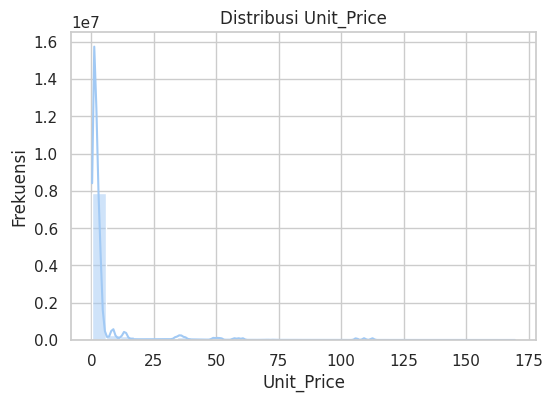

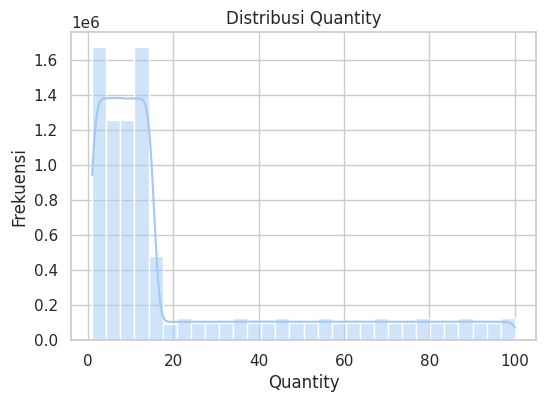

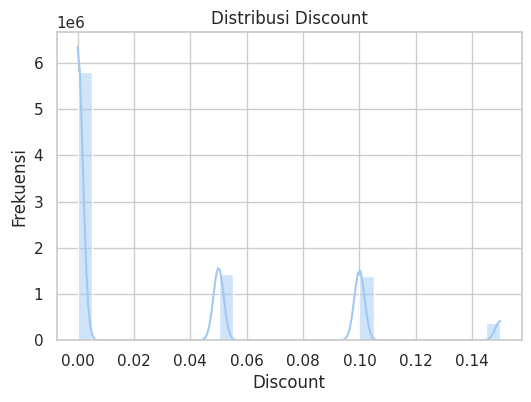

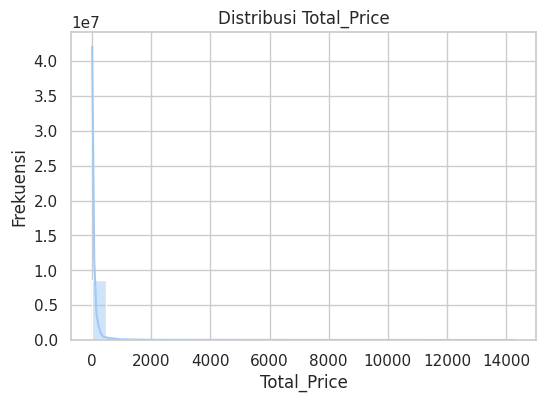

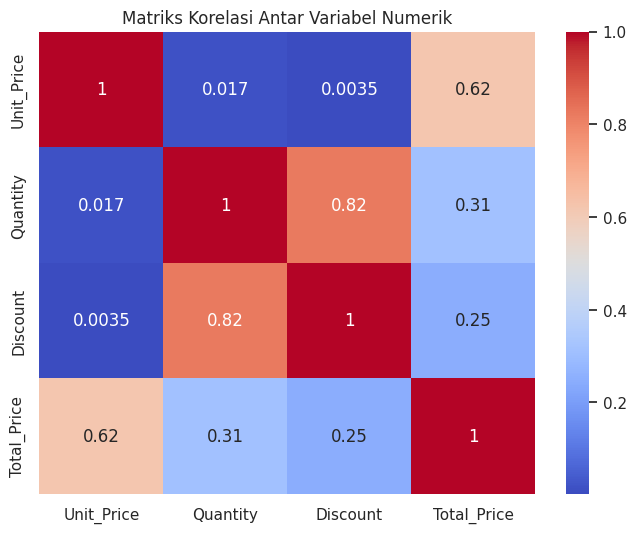

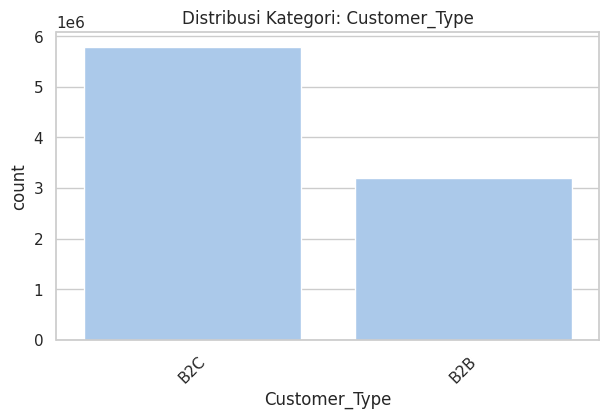

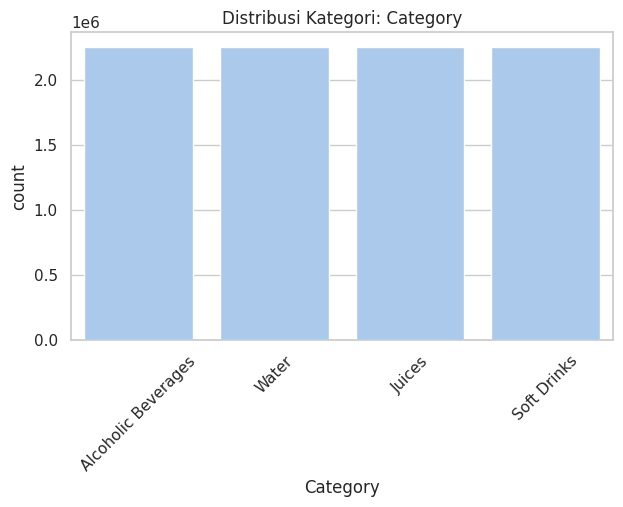

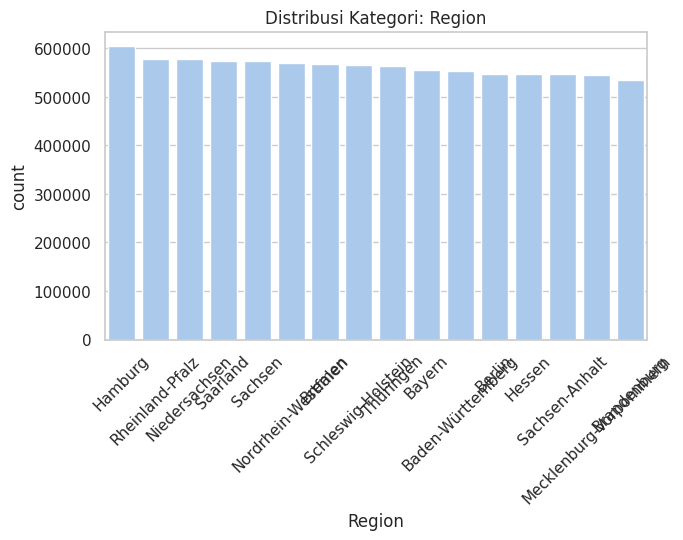

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


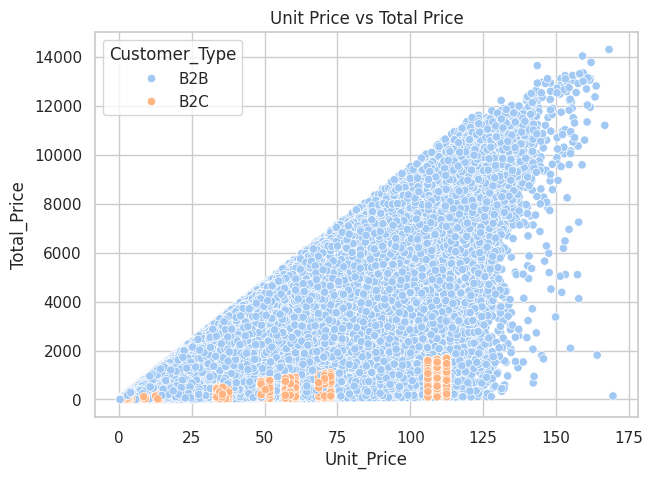

In [3]:
# Setting tampilan visual
%matplotlib inline
sns.set(style="whitegrid", palette="pastel")

# 1. MEMAHAMI STRUKTUR DATA

print(">> Ukuran Dataset:")
print(df.shape)

print("\n>> Tipe Data Tiap Kolom:")
print(df.dtypes)

print("\n>> Lima Baris Pertama Dataset:")
print(df.head())

# 2. MENANGANI DATA HILANG

print("\n>> Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

# 3. ANALISIS DISTRIBUSI DATA NUMERIK
# Statistik deskriptif
print("\n>> Statistik Deskriptif Data Numerik:")
print(df.describe())
# Histograms untuk semua data numerik
num_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

# 4. KORELASI ANTAR VARIABEL NUMERIK

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi Antar Variabel Numerik")
plt.show()

# 5. VISUALISASI VARIABEL KATEGORIKAL

cat_cols = ['Customer_Type', 'Category', 'Region']

for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribusi Kategori: {col}")
    plt.xticks(rotation=45)
    plt.show()

# 6. SCATTER PLOT UNTUK HUBUNGAN ANTAR FITUR

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Unit_Price', y='Total_Price', hue='Customer_Type')
plt.title("Unit Price vs Total Price")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.


In [3]:
df_clean = df.copy()

# 1. DETEKSI DAN PENANGANAN OUTLIER (Z-score)
num_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']
z_scores = np.abs(stats.zscore(df_clean[num_cols]))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
print(f"Jumlah data outlier: {outliers.sum()}")
df_clean = df_clean[~outliers]

# 2. ENCODING KATEGORIKAL
cat_cols = ['Customer_Type', 'Category', 'Region']
df_encoded = pd.get_dummies(df_clean, columns=cat_cols, drop_first=True)

# 3. FITUR BARU (Revenue per Unit)
df_encoded['Revenue_per_Unit'] = df_clean['Total_Price'] / df_clean['Quantity']

# 4. EKSTRAKSI TANGGAL
df_encoded['Order_Date'] = pd.to_datetime(df_encoded['Order_Date'])
df_encoded['Order_Month'] = df_encoded['Order_Date'].dt.month
df_encoded['Order_Day'] = df_encoded['Order_Date'].dt.day
df_encoded['Order_Weekday'] = df_encoded['Order_Date'].dt.weekday

# 6. BINNING pada Total_Price
df_encoded['Total_Price_Bin'] = pd.qcut(
    df_clean['Total_Price'],
    q=3,
    labels=["Low", "Medium", "High"]
)
df_encoded = pd.get_dummies(df_encoded, columns=['Total_Price_Bin'])

# 7. NORMALISASI (STANDARISASI) FITUR NUMERIK
num_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Revenue_per_Unit', 'Order_Month', 'Order_Day', 'Order_Weekday']
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# 8. HAPUS KOLOM YANG TIDAK DIBUTUHKAN UNTUK CLUSTERING
df_final = df_encoded.drop(columns=['Order_ID', 'Customer_ID', 'Product', 'Order_Date'])

# 9. BATASI BARIS
df_final = df_final.head(5000)

# 10. PCA
pca = PCA(n_components=0.95, random_state=42)
df_pca = pca.fit_transform(df_final)

print("\n>> Dataset setelah preprocessing:")
print(pd.DataFrame(df_pca).head())
print("Dimensi setelah PCA:", df_pca.shape)

Jumlah data outlier: 340919

>> Dataset setelah preprocessing:
         0         1         2         3         4         5         6   \
0  0.917259  2.022366 -0.011127  0.845233 -0.620330  0.135850 -0.679271   
1  1.498771  2.791349 -0.076619  0.818913 -0.623736  0.209944 -0.385044   
2  0.756388  1.888566 -0.002307  0.856256 -0.610911 -0.018311 -0.024520   
3  1.577018  1.935909 -0.015199  0.830406 -0.583214 -0.246409  0.032338   
4  0.138438  1.590950  0.010314  0.874652 -0.618415 -0.462615 -0.455952   

         7         8         9         10        11        12        13  \
0 -0.308182  0.538234  0.125440  0.380623 -0.069654 -0.031935  0.005616   
1 -0.275659  0.522992  0.886354 -0.249452 -0.005613 -0.060226  0.013848   
2  0.707189 -0.496569  0.951871 -0.100766 -0.028446 -0.009216  0.016756   
3 -0.581981 -0.480952 -0.256240 -0.035676 -0.027363 -0.037313  0.002048   
4 -0.076441  1.289841 -0.642735 -0.031582  0.008265 -0.063529 -0.023040   

         14        15        16    

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.

In [4]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_final)

df_clustered = df_final.copy()
df_clustered['Cluster'] = cluster_labels

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif.

>> Silhouette Scores per k:
k = 2: Silhouette Score = 0.5591
k = 3: Silhouette Score = 0.2831
k = 4: Silhouette Score = 0.1534
k = 5: Silhouette Score = 0.1579
k = 6: Silhouette Score = 0.1442
k = 7: Silhouette Score = 0.1225
k = 8: Silhouette Score = 0.1289
k = 9: Silhouette Score = 0.1215
k = 10: Silhouette Score = 0.1252

>> Nilai Silhouette Score saat k=2: 0.5591


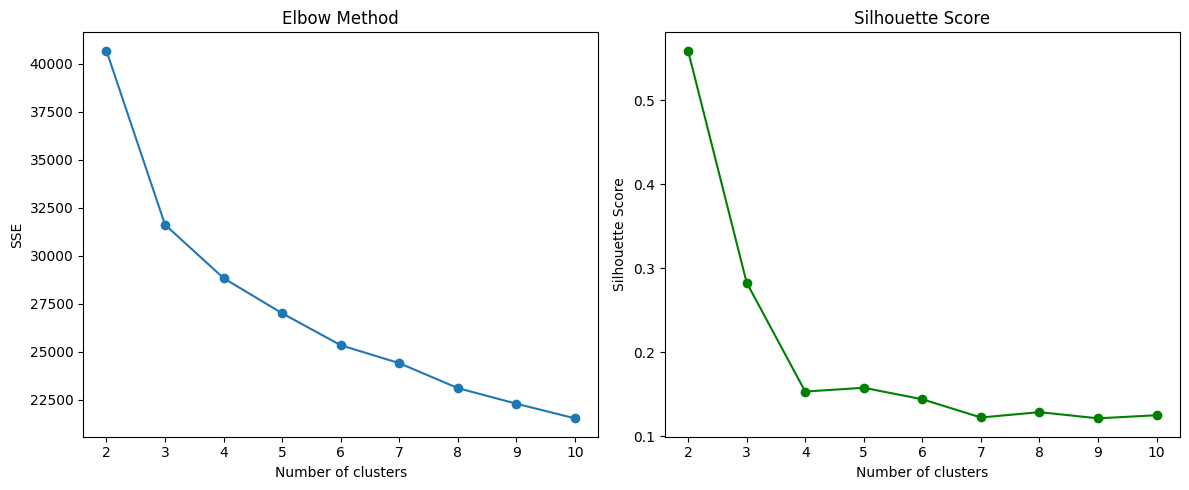

In [5]:
sse = []
silhouette_scores = []
K_range = range(2, 11)

print(">> Silhouette Scores per k:")
for k in K_range:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(df_final)
    inertia = model.inertia_
    sil_score = silhouette_score(df_final, labels)

    sse.append(inertia)
    silhouette_scores.append(sil_score)

    print(f"k = {k}: Silhouette Score = {sil_score:.4f}")

print("\n>> Nilai Silhouette Score saat k=2:", round(silhouette_scores[0], 4))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

plt.subplot(1,2,2)
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [6]:
X = df_final.copy()

initial_kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
initial_labels = initial_kmeans.fit_predict(X)

selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(X, initial_labels)

k = 2
kmeans_selected = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels_selected = kmeans_selected.fit_predict(X_selected)

silhouette_selected = silhouette_score(X_selected, cluster_labels_selected)
print(f">> Silhouette Score setelah SelectKBest: {silhouette_selected:.4f}")

>> Silhouette Score setelah SelectKBest: 0.7634


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.


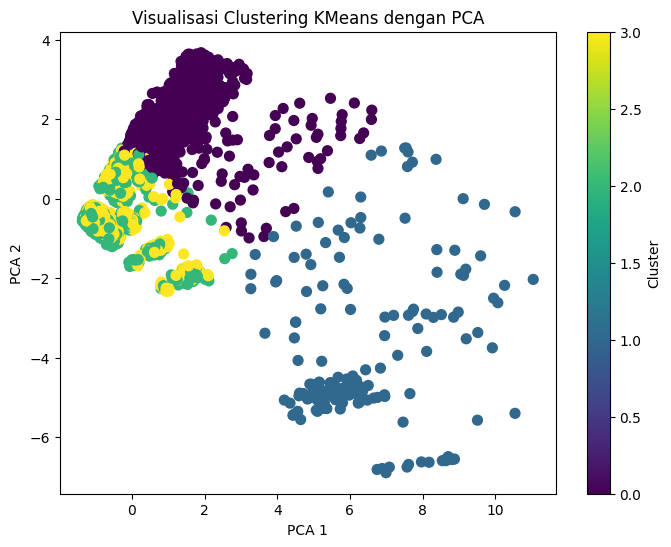

In [7]:
pca_vis = PCA(n_components=2)
vis_components = pca_vis.fit_transform(df_final)

plt.figure(figsize=(8, 6))
plt.scatter(vis_components[:, 0], vis_components[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title("Visualisasi Clustering KMeans dengan PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [8]:
df_clustered = df_final.copy()
df_clustered['Cluster'] = cluster_labels_selected

scaler = StandardScaler()
num_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price',
            'Revenue_per_Unit', 'Order_Month', 'Order_Day', 'Order_Weekday']
scaler.fit(df_encoded[num_cols])
df_clustered[num_cols] = scaler.inverse_transform(df_clustered[num_cols])

df_categorical = df_clean[['Customer_Type', 'Category', 'Region']].reset_index(drop=True)

df_interpreted = pd.concat([df_clustered.reset_index(drop=True), df_categorical], axis=1)

print(">> Contoh hasil interpretasi clustering:")
print(df_interpreted[['Cluster', 'Customer_Type', 'Category', 'Region',
                      'Unit_Price', 'Quantity', 'Total_Price']].head())

cluster_summary = df_interpreted.groupby('Cluster').agg({
    'Unit_Price': 'mean',
    'Quantity': 'mean',
    'Discount': 'mean',
    'Total_Price': 'mean',
    'Revenue_per_Unit': 'mean',
    'Customer_Type': lambda x: x.value_counts().index[0],
    'Category': lambda x: x.value_counts().index[0],
    'Region': lambda x: x.value_counts().index[0],
})

print("\n>> Rangkuman karakteristik setiap cluster:")
print(cluster_summary)

>> Contoh hasil interpretasi clustering:
   Cluster Customer_Type     Category             Region  Unit_Price  \
0      0.0           B2B        Water  Baden-Württemberg   -0.275336   
1      0.0           B2B        Water  Baden-Württemberg   -0.291210   
2      0.0           B2B  Soft Drinks  Baden-Württemberg   -0.353119   
3      0.0           B2B       Juices  Baden-Württemberg   -0.027702   
4      0.0           B2B        Water  Baden-Württemberg   -0.400741   

   Quantity  Total_Price  
0  1.143513     0.086683  
1  2.540623     0.406479  
2  1.898708     0.099968  
3  1.370072     0.708923  
4  0.463838    -0.264293  

>> Rangkuman karakteristik setiap cluster:
         Unit_Price  Quantity  Discount  Total_Price  Revenue_per_Unit  \
Cluster                                                                  
0.0       -0.176258 -0.027274 -0.042084    -0.147608         -0.174199   
1.0        4.381050  0.147897  0.258849     3.318722          4.335386   

        Customer_Type  

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [9]:
num_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price',
            'Revenue_per_Unit', 'Order_Month', 'Order_Day', 'Order_Weekday']

scaler = StandardScaler()
scaler.fit(df_encoded[num_cols])

df_final[num_cols] = scaler.inverse_transform(df_final[num_cols])


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.


>> Ringkasan Karakteristik Setiap Cluster:
         (Unit_Price, min)  (Unit_Price, max)  (Unit_Price, mean)  \
Cluster                                                             
0                     0.32              20.03            2.284154   
1                     9.05              49.42           30.993430   

         (Quantity, min)  (Quantity, max)  (Quantity, mean)  (Discount, min)  \
Cluster                                                                        
0                      1              100         21.993741              0.0   
1                      1               99         26.632850              0.0   

         (Discount, max)  (Discount, mean)  (Total_Price, min)  \
Cluster                                                          
0                   0.15          0.027446                0.40   
1                   0.15          0.040821               27.53   

         (Total_Price, max)  (Total_Price, mean)  (Revenue_per_Unit, min)  \
Cluster          

<ipython-input-10-78e14a4cb7d1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean_subset, x='Cluster', palette='Set2')


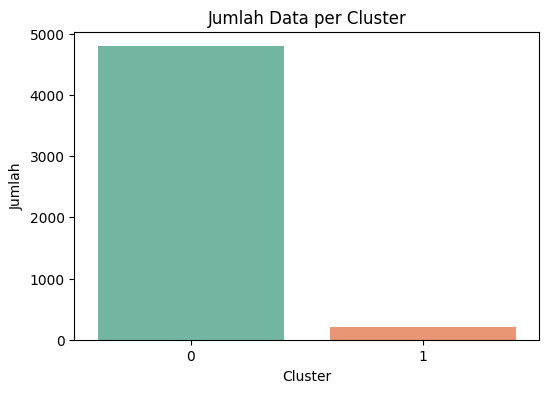

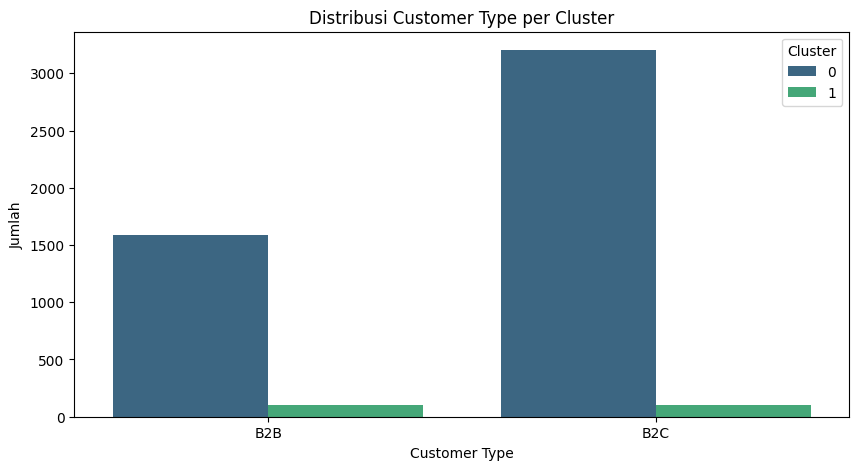

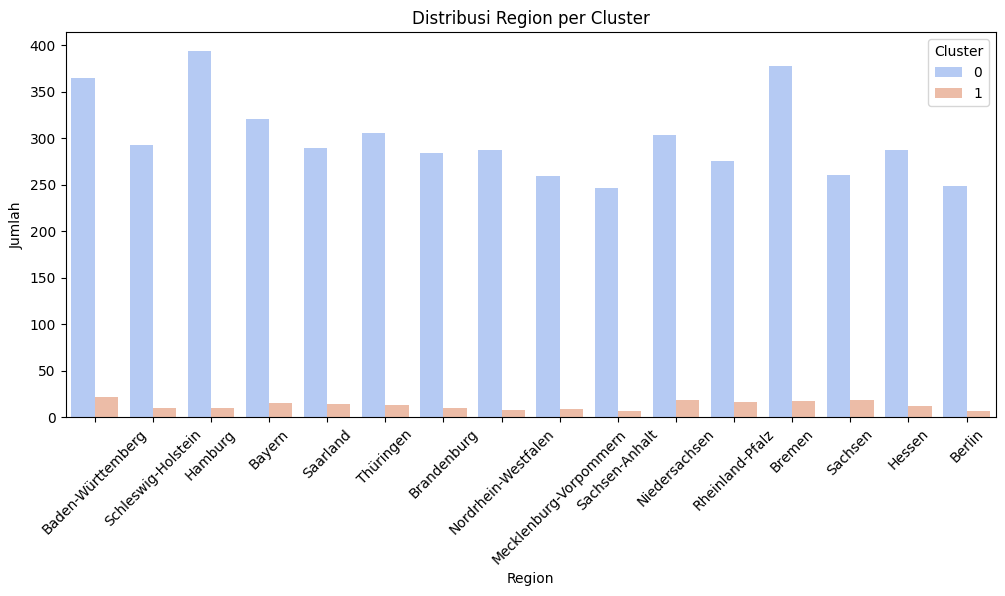

In [10]:

df_clean['Revenue_per_Unit'] = df_clean['Total_Price'] / df_clean['Quantity']

df_clean_subset = df_clean.iloc[:5000].copy()

df_clean_subset['Cluster'] = kmeans_selected.labels_

numeric_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Revenue_per_Unit']
agg_numeric = df_clean_subset.groupby('Cluster')[numeric_cols].agg(['min', 'max', 'mean'])

def get_mode(series):
    mode_values = series.mode()
    if not mode_values.empty:
        return mode_values[0]
    else:
        return np.nan

categorical_cols = ['Customer_Type', 'Region']
agg_categorical = df_clean_subset.groupby('Cluster')[categorical_cols].agg(get_mode)

cluster_summary = pd.concat([agg_numeric, agg_categorical], axis=1)

print(">> Ringkasan Karakteristik Setiap Cluster:")
print(cluster_summary)

plt.figure(figsize=(6,4))
sns.countplot(data=df_clean_subset, x='Cluster', palette='Set2')
plt.title("Jumlah Data per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df_clean_subset, x='Customer_Type', hue='Cluster', palette='viridis')
plt.title("Distribusi Customer Type per Cluster")
plt.xlabel("Customer Type")
plt.ylabel("Jumlah")
plt.show()

plt.figure(figsize=(12,5))
sns.countplot(data=df_clean_subset, x='Region', hue='Cluster', palette='coolwarm')
plt.title("Distribusi Region per Cluster")
plt.xlabel("Region")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()



    Cluster Unit_Price   Quantity  Discount  Total_Price Revenue_per_Unit                                                             
    0          2.284154  21.993741  0.027446    44.614684          2.224462
    1         30.993430  26.632850  0.040821   556.007536         30.056253

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- Rata-rata Unit Price: 2.28

- Rata-rata Quantity: 21.99

- Rata-rata Discount: 2.74%

- Rata-rata Total Price: 44.61

- Rata-rata Revenue per Unit: 2.22

- Tipe Pelanggan: B2C

- Wilayah Dominan: Hamburg

Analisis:
Cluster ini mewakili pelanggan dengan karakteristik pembelian produk berharga rendah dalam jumlah yang cukup besar. Mereka kemungkinan besar adalah pelanggan ritel (B2C) dari wilayah Hamburg. Diskon yang diberikan relatif kecil, menunjukkan bahwa pembelian mereka tidak terlalu dipengaruhi oleh promosi atau negosiasi harga. Pelanggan di cluster ini bisa menjadi target strategi pemasaran massal, penawaran bundling, atau program loyalitas yang mendorong pembelian rutin.

## Cluster 1:

- Rata-rata Unit Price: 30.99

- Rata-rata Quantity: 26.63

- Rata-rata Discount: 4.08%

- Rata-rata Total Price: 556.01

- Rata-rata Revenue per Unit: 30.05

- Tipe Pelanggan: B2C

- Wilayah Dominan: Baden-Württemberg

Analisis:
Cluster ini terdiri dari pelanggan yang membeli produk dengan harga lebih tinggi dan dalam volume yang besar, menghasilkan total transaksi yang jauh lebih tinggi dibandingkan cluster lainnya. Diskon yang mereka peroleh lebih tinggi, yang bisa jadi menunjukkan adanya negosiasi atau strategi retensi pelanggan. Meski tetap berada dalam segmen B2C, pelanggan dalam cluster ini memiliki perilaku pembelian mirip B2B atau premium buyer. Mereka sangat cocok untuk strategi pemasaran eksklusif, penawaran personal, program loyalitas tingkat lanjut, dan pendekatan penjualan langsung (direct selling).



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [11]:
df_clean_subset.to_csv('hasil_clustering.csv', index=False)

print("Hasil clustering berhasil disimpan ke 'hasil_clustering.csv'")

from google.colab import files
files.download('hasil_clustering.csv')

Hasil clustering berhasil disimpan ke 'hasil_clustering.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>